# Machine Learning Vs Deep Learning

| Basis of Comparison  | Machine Learning | Deep Learning | Example |
|----------------------|------------------|---------------|---------|
| Data Dependency | Usually performs well with small or medium sized datasets. | Requires large amounts of data to understand and learn from it. | A simple regression model (ML) can work with fewer data points, but a Convolutional Neural Network (DL) needs thousands of images for effective learning. |
| Feature Extraction | Features need to be manually and carefully selected and extracted. | Can automatically learn and extract features from raw data. | For spam detection, ML would need manual extraction of features (e.g., sender, frequency of words) while DL can learn important features directly from raw emails. |
| Interpretability | Generally easier to interpret and understand the decision-making process. | More complex and often considered a "black box" for its decision-making process. | In ML (like a Decision Tree), we can see the criteria used for decision-making, but DL models like Neural Networks don't easily provide insights into their internal parameters. |


## Performance Comparision w.r.t Data
<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/ai%2520vs%2520machine%2520learning%2520vs%2520deep%2520learning%25204.png" width=600>

# What is TensorFlow?
TensorFlow is a open-source deep learning framework that supports **parallel** computing, **hardware accelerated** computing unlike **Numpy**. All necessary **layers/blocks** for Deep Learning are already in TensorFlow.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/TensorFlow_logo.svg/2560px-TensorFlow_logo.svg.png" width=400>

In [1]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Hardware Accelerated & Parallel Computing

## CPU
CPUs are versatile processors capable of running a diverse range of software applications - from word processing and bank transactions to controlling rocket engines and powering neural networks. However, their general-purpose design and sequential execution limit their speed in handling large, complex computations that benefit from parallel processing. Even having multiple cores **(8-12 in Intel's i7 and i9**), CPUs lag in parallel tasks due to **fewer cores compared to GPUs' thousands**, impacting large-scale computations.
<img src="https://cloud.google.com/static/tpu/docs/images/image6.gif">

### Config

In [2]:
import psutil
import cpuinfo

# Retrieve RAM information
ram = psutil.virtual_memory()
total_ram = ram.total/1024**3  # Total physical memory available in bytes

# Retrieve CPU information
cpu_count = psutil.cpu_count(logical=False)  # Number of physical CPU cores
cpu_name = cpuinfo.get_cpu_info()["brand_raw"]  # Name of the CPU

# Print the retrieved information
print(f"RAM: {total_ram:0.2f} bytes")
print(f"CPU Cores: {cpu_count}")
print(f"CPU Name: {cpu_name}")


RAM: 15.63 bytes
CPU Cores: 1
CPU Name: Intel(R) Xeon(R) CPU @ 2.00GHz


## GPU
GPUs, or Graphics Processing Units, are remarkable for their computational power. Each one houses between 2,500 to 5,000 Arithmetic Logic Units (ALUs), enabling them to handle thousands of multiplications and additions concurrently. This is key to their high-throughput performance.

> More core counts not necessarily means it is better. As in Apple M2 Max GPU (38 cores) is faster than the Nvidia GeForce RTX 3070 in some benchmarks, even though the RTX 3070 has 5888 cores. This is because the M2 Max GPU has a higher memory bandwidth and a newer architecture.

<img src="https://cloud.google.com/static/tpu/docs/images/image2.gif" width=800>

### Install Libraries
1. Q. What if the library we want to `import` don't don't exist in the system???
    * Ans. We've to install that library using `pip install` command.
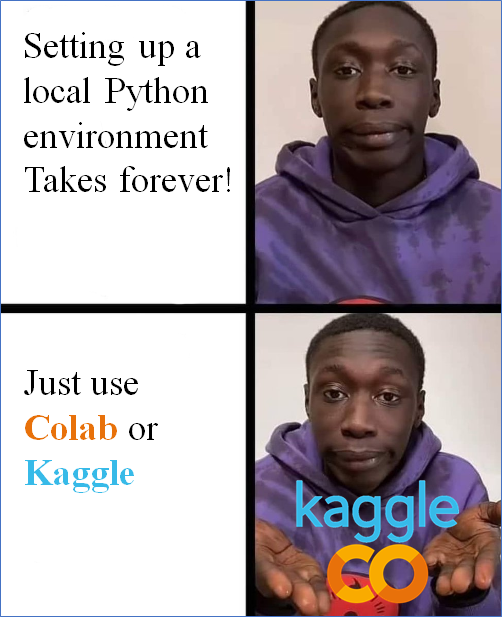


2. Q. As in MatLab we don't have to install any libraries, does it mean it is better?
    * Ans.
        * 15.6 GB installation file 🥴
        * Have we used all the toolbox/functions in MatLab?? 🙄 
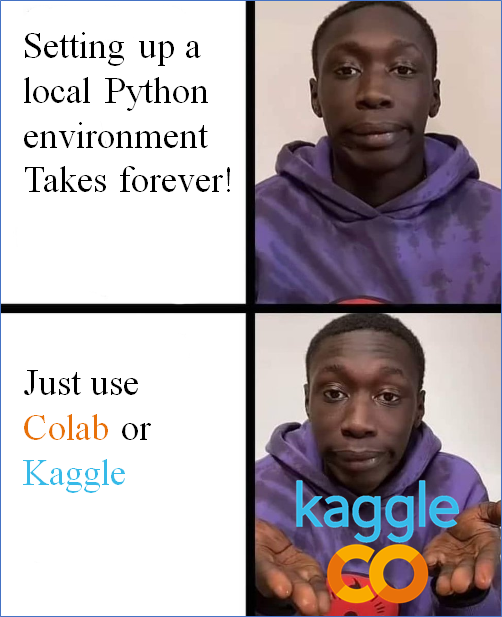

In [3]:
!pip install -q pycuda
!pip install -q gputil

### Config

In [4]:
import GPUtil
from pycuda import driver
import pycuda.driver as cuda


# Initialize the driver
driver.init()

# Get GPU details
def get_gpu_details():
    gpu_details = []
    
    # Get the number of devices (GPUs)
    num_gpu = driver.Device.count()
    
    # Iterate over each device
    for i in range(num_gpu):
        gpu = driver.Device(i)
        
        # Get GPU name, cores, and memory info
        name = gpu.name()
        compute_capability = gpu.compute_capability()
        total_memory = gpu.total_memory() / (1024**3) # Convert bytes to GB

        # Calculate cores
        ## Get the number of multiprocessors (SMs, Streaming Multiprocessors)
        num_multiprocessors = gpu.get_attribute(driver.device_attribute.MULTIPROCESSOR_COUNT)
        ## Number of CUDA cores per multiprocessor: 64 for Tesla T4
        cores_per_multiprocessor = 64

        # Total number of CUDA cores
        total_cuda_cores = num_multiprocessors * cores_per_multiprocessor
        
        gpu_details.append({
            'Device': i,
            'Name': name,
            'VRAM (GB)': round(total_memory, 1),
            'Cores': total_cuda_cores
        })
    
    return gpu_details

get_gpu_details()

[{'Device': 0,
  'Name': 'Tesla P100-PCIE-16GB',
  'VRAM (GB)': 15.9,
  'Cores': 3584}]

## TPU

While GPUs boost performance for tasks with heavy parallelism like neural networks, they, like CPUs, still serve as general-purpose processors, handling various applications and software. This requirement for versatility can slow down calculations in their thousands of ALUs.

Google's Cloud Tensor Processing Units (TPU) designed specifically for neural network workloads, large-scale matrix operations. TPUs can't run general tasks like word processors or control rocket engines, but they excel in matrix processing, their primary function as they require less memory access than GPUs.

> Code for TPU is complicated than GPUs as many pythonic operations can't be done on TPUs.

<img src="https://cloud.google.com/static/tpu/docs/images/image4_5pfb45w.gif" width=800> <img src="https://cloud.google.com/static/tpu/docs/images/image1_2pdcvle.gif" width=800>

## Multi-GPU Computing
<img src="https://images.nvidia.com/aem-dam/Solutions/design-visualization/nvlink/design-visualization-nvlink-animation-625-t@2x.gif" width=600>

# TensorFlow in Action ⚡️

In [5]:
import numpy as np
import time

# Create random matrices
size = 5000
matrix_a = np.random.rand(size, size)
matrix_b = np.random.rand(size, size)

# NumPy matrix multiplication
start_time = time.time()
numpy_result = np.matmul(matrix_a, matrix_b)
numpy_time = time.time() - start_time

# TensorFlow matrix multiplication

## Tensors in CPU
with tf.device('/CPU:0'):
    tf_matrix_a = tf.convert_to_tensor(matrix_a)
    tf_matrix_b = tf.convert_to_tensor(matrix_b)
    
## MatMul in GPU
for _ in range(2):
    with tf.device(f'/GPU:0'):
        start_time = time.time()
        tf_result = tf.matmul(tf_matrix_a, tf_matrix_b)
        tf_time = time.time() - start_time
    
# Check if the results match
print("NumPy time: ", numpy_time)
print("TensorFlow time: ", tf_time)
print(f"Faster: {int(numpy_time/tf_time)}x")

NumPy time:  4.053805589675903
TensorFlow time:  0.00030303001403808594
Faster: 13377x


# How to use TensorFlow for Operation
Tensorflow operations are very similar to numpy. Name of th function/class may differ but usecase is very similar. So if we can convert numpy array to tensorflow tensor then we can do all the operations we do in numpy now in tensorflow. So let's see how can we convert numpy array to tensorflow.

## Constant

In [6]:
a = np.array(1)
print(a)
print(type(a))
print(a.shape)

1
<class 'numpy.ndarray'>
()


In [7]:
b = tf.constant(1)
print(b)
print(type(b))
print(b.shape)

tf.Tensor(1, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
()


## Array

In [8]:
a = np.array([[0, 1], [2, 3]])
print(a)
print(type(a))
print(a.shape)

[[0 1]
 [2 3]]
<class 'numpy.ndarray'>
(2, 2)


In [9]:
b = tf.constant([[0, 1], [2, 3]])
print(b)
print(type(b))
print(b.shape)

tf.Tensor(
[[0 1]
 [2 3]], shape=(2, 2), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(2, 2)


## Numpy to TensorFlow

In [10]:
b = tf.constant(a) # numpy to tensorflow
b

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[0, 1],
       [2, 3]])>

In [11]:
b = tf.convert_to_tensor(a) # numpy to tensorflow
b

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[0, 1],
       [2, 3]])>

## TensorFlow to Numpy

In [12]:
c = b.numpy()
c

array([[0, 1],
       [2, 3]])

# Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It's used for developing and training machine learning models in a user-friendly, modular, and easy-to-extend way.

<img src="https://keras.io/img/logo.png" width=400>

## TensorFlow Vs Keras
|             | TensorFlow                                                                                     | Keras                                                                                            |
|-------------|-----------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| Flexibility | Provides both high-level and low-level APIs, offering more flexibility and control.             | Mainly provides high-level APIs, making it more user-friendly but less flexible for complex models.|
| Speed       | Tensorflow can be slower due to its comprehensive and detailed nature.                          | Keras is generally faster to work with because it is simpler and more streamlined.               |
| Debugging   | Debugging is more complex due to lower level API operations.                                   | Because of its high-level API and simplicity, debugging is easier in Keras.                     |

# Neural Network
A neural network is a machine learning algorithm inspired by the **human brain**. It is a network of **interconnected nodes** that learn to process information in a way that is similar to how the brain does. The term `neural` is used because the artificial neurons in a neural network are designed to mimic the behavior of biological neurons in the brain. The main similarity between artificial neurons and biological neurons is that they both **receive inputs**, **process them**, and then **generate outputs**.

> The outputs of artificial neurons are typically used to make predictions or decisions.

<img src="https://askabiologist.asu.edu/sites/default/files/resources/plosable/Brain_Speed/connected-neurons.jpg" width=400><img src="https://s7280.pcdn.co/wp-content/uploads/2020/07/Two-or-more-hidden-layers-comprise-a-Deep-Neural-Network.png" width=400>

## Perceptron
Perceptron aka Neuron is building block of neural network. This uses same transformation similar to **Linear Regression**.

### Single Input
<img src="">
<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/mfOlDR6.png" width="300" alt="A Linear Unit.">
<figcaption style="textalign: center; font-style: italic"><center>A Linear Unit (Neuron) with weights (w) and bias (b).
</center></figcaption>
</figure>
Equation:
$$
y = wx + b
$$
In a neural network, the input $x$ is connected to a neuron with a weight $w$. The value that reaches the neuron is obtained by multiplying the input by the weight: $(w \cdot x)$. The bias $b$ is a special weight that allows the neuron to modify the output independently of its inputs. The neuron's output $y$ is calculated by summing the weighted inputs and the bias: $(y = w \cdot x + b)$. This activation formula enables the neuron to process information and produce an output within the neural network."

### Multi Input
<img src="">
<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/vyXSnlZ.png" width="300" alt="A Linear Unit.">
<figcaption style="textalign: center; font-style: italic"><center>Multi input Linear Unit (Neuron) with weights(w_i) and bias (b).
</center></figcaption>
</figure>
Equation:
$$
\begin{aligned}
y &= (\sum_{i=0}^2 w_i x_i) + b\\
  &= w_0x_0 + w_1x_1 + w_2x_2 + b
\end{aligned}
$$

## Layers - Multiple Perceptrons

Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense** layer.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/2MA4iMV.png" width="300" alt="A stack of three circles in an input layer connected to two circles in a dense layer.">
<figcaption style="textalign: center; font-style: italic"><center>A dense layer of two linear units receiving two inputs and a bias.
</center></figcaption>
</figure>

You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways. In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.

## Activation

1. Activations are used in layer outputs to introduce **non-linearity**, without activation, the model **cannot learn any non-linear relationships**.

<img src="https://1.bp.blogspot.com/-sdjQ8niYrdk/X7M_7r8aLwI/AAAAAAAABA4/dswGpncK8mcs378HbaVWljF9SHGflDlVgCLcBGAsYHQ/s1322/nls_fit.png" width=500>
                                                                                                                                                  
2. Moreover, **multiple linear layers without activation are equivalent to a single linear layer**. Here's an example. Suppose we have two linear layer namely $Z_1$ and $Z_2$. Second layer ($Z_2$) takes first layer ($Z_1$) as input. So,

$$
\begin{aligned}
Z_1 &= W_1 \cdot X + b_1\\
Z_2 &= W_2 \cdot Z_1 + b_2
\end{aligned}
$$

Substituting $Z_1$ from the first layer into the equation of the second layer, we have:

$$
\begin{aligned}
Z_2 &= W_2 \cdot (W_1 \cdot X + b_1) + b_2\\
    &= W_2 \cdot (W_1 \cdot X + b_1) + b_2\\
    &= (W_2 \cdot W_1) \cdot X + (W_2 \cdot b_1 + b_2)\\
    &= W_3 \cdot X + b_3\\
\end{aligned}
$$
    
    
3. Here are some common activations that are used in deep learning,
<img src="https://www.researchgate.net/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU.ppm" width=700>

<!-- 4. Modern activations
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/ReLU_and_GELU.svg/800px-ReLU_and_GELU.svg.png" width=400>

<img src="https://miro.medium.com/v2/resize:fit:826/1*6tUAKb3_1uGybwSufey3ZA.tiff" width=400> -->

4. We'll apply ReLU activation to a linear unit which means the output becomes `max(0, w * x + b)`, which we might draw in a diagram like:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/eFry7Yu.png" width="250" alt="Diagram of a single ReLU. Like a linear unit, but instead of a '+' symbol we now have a hinge '_/'. ">
<figcaption style="textalign: center; font-style: italic"><center>A rectified linear unit.
</center></figcaption>
</figure>

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

# Build neuron
neuron = layers.Dense(units=1, use_bias=True, activation='relu')

# Forwad pass
NUM_SAMPLES = 1
NUM_FEATURES = 3
inp = tf.random.uniform(shape=(NUM_SAMPLES, NUM_FEATURES))
out = neuron(inp)

# Display i/p , o/p details
print('input:', inp)
print('output:',out)

input: tf.Tensor([[0.08437097 0.81569827 0.16098094]], shape=(1, 3), dtype=float32)
output: tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


## Multi Layer Perceptron (MLP)

A Multi Layer Perceptron (MLP) is a type of neural network architecture that consists of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer. Each layer's nodes are interconnected with those in the next layer, hence the term "fully connected" network. Here are some common aliases of Multi-Layer Perceptron (MLP),
1. **Dense** or **DNN (Dense Neural Network)**
2. **FFN (Feed-Forward Network)**
3. **FCN (Fully Connected Network)**
4. **Linear Layer**
5. **ANN (Artificial Neural Network)**

The nonlinearity in MLP is introduced by activation functions after each layer. Hidden layers apply these functions to the input data, performing complex data transformations that help the network learn and make accurate predictions.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Y5iwFQZ.png" width="450" alt="An input layer, two hidden layers, and a final linear layer.">
<figcaption style="textalign: center; font-style: italic"><center>A stack of dense layers makes a "fully-connected" network.
</center></figcaption>
</figure>

The layers before the output layer are referred to as **hidden** since their outputs are not directly observed. The final (output) layer is typically a linear unit for regression tasks (predicting an arbitrary numeric value). For other tasks like classification, an activation function might be required at the output.

When building models in Keras, two APIs are commonly used:
1. **Sequential API**: A simple linear stack of layers that's easy to use but allows less flexibility.
2. **Functional API**: A more flexible option that allows complex model architectures, including multi-input and multi-output models.

## Sequential API
The Sequential API in Keras allows for the construction of models layer-by-layer in a sequential manner, which means that each layer has exactly one input tensor and one output tensor, hence its name.

## Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


## Model Plot


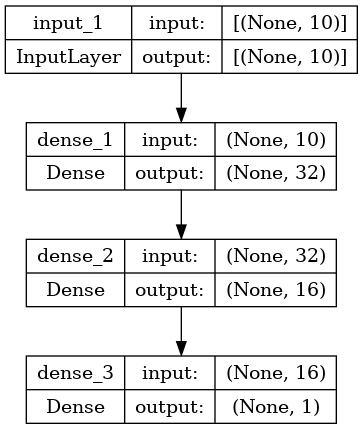

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

model = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

print("## Model Summary:")
model.summary()

print("\n\n## Model Plot")
plot_model(model,show_shapes=True)

## Functional API
The Functional API in Keras allows for the creation of more complex models with multiple inputs, multiple outputs, or models with shared or recurrent layers, providing a more flexible and expressive way to define models than the Sequential API.

## Model Summary:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_4 (Dense)             (None, 32)                352       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


## Model Plot


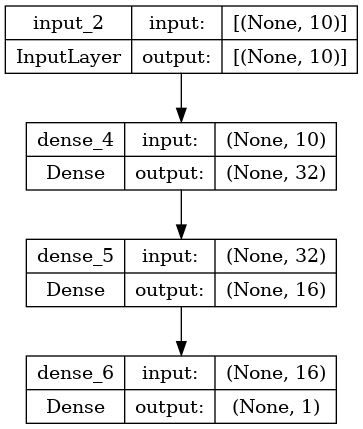

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

inp = layers.Input(shape=(10,))
x = layers.Dense(32, activation='relu')(inp)
x = layers.Dense(16, activation='relu')(x)
out = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=out)

print("## Model Summary:")
model.summary()

print("\n\n## Model Plot")
plot_model(model, show_shapes=True)


# Brain Storm 🧠
Write code to implement following model where final output should be `softmax` activated and rest should be `relu` activated,
> **Hint**: use `layers.Add` for **Add** operation

## Model Summary:
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 32)           2080        ['input_3[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 32)           2080        ['input_4[0][0]']                
                                                                          

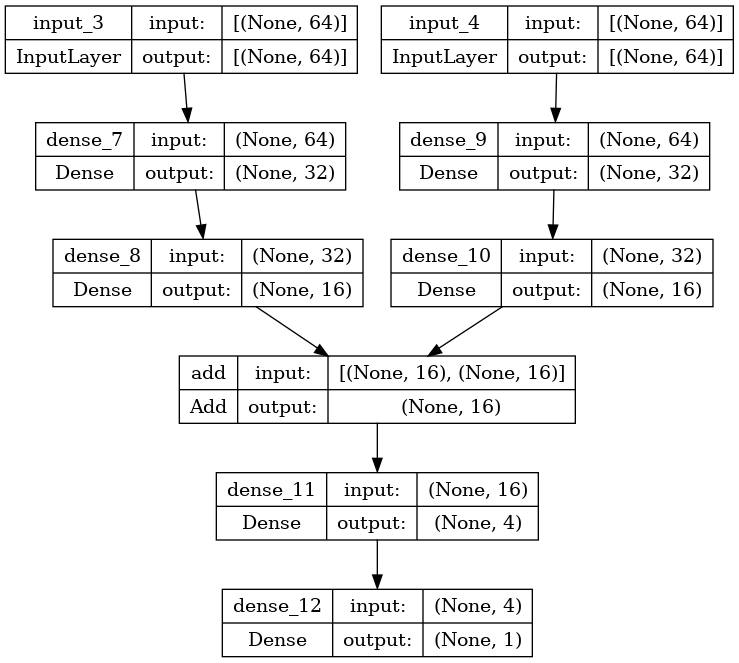

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

# define two sets of inputs
inputA = layers.Input(shape=(64,))
inputB = layers.Input(shape=(64,))

# first branch
x = layers.Dense(32, activation="relu")(inputA)
x = layers.Dense(16, activation="relu")(x)

# second branch
y = layers.Dense(32, activation="relu")(inputB)
y = layers.Dense(16, activation="relu")(y)

# combine the output of the two branches
combined = layers.Add()([x, y])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = layers.Dense(4, activation="relu")(combined)
z = layers.Dense(1, activation="softmax")(z)

# model is created with two inputs and one output
model = Model(inputs=[inputA, inputB], outputs=z)

print("## Model Summary:")
model.summary()

print("\n\n## Model Plot")
plot_model(model, show_shapes=True)
